In [1]:
import uproot, numpy as np

In [2]:
def load_file(filename, treename):
    file = uproot.open(filename)
    tree = file[treename]

    df = tree.arrays(
        [
            "success",
            "trueNuEnergy",
            "trueNuHits",
            "isBestSlice",
            "sliceHits_U",
            "sliceHits_V",
            "sliceHits_W",
            "sliceNuHits_U",
            "sliceNuHits_V",
            "sliceNuHits_W",
            "sliceCRHits_U",
            "sliceCRHits_V",
            "sliceCRHits_W",
            "missingNuHits_U",
            "missingNuHits_V",
            "missingNuHits_W",
            "nuSliceComp_U",
            "nuSliceComp_V",
            "nuSliceComp_W",
            "nuSlicePur_U",
            "nuSlicePur_V",
            "nuSlicePur_W",
        ],
        library="pd",
    )
    file.close()

    return df

In [3]:
import os

def save_plot(fig, filename, subdir=None):
    if subdir is None:
        subdir = ""
    elif subdir.startswith("/"):
        subdir = subdir[1:]
        
    if not os.path.exists('images'):
        os.mkdir('images')
    for img_type in [ "png", "svg", "eps", "pdf" ]:
        if not os.path.exists(f'images/{img_type}'):
            os.mkdir(f'images/{img_type}')
        if not os.path.exists(f'images/{img_type}/{subdir}'):
            os.mkdir(f'images/{img_type}/{subdir}')
        fig.savefig(f'images/{img_type}/{subdir}/{filename}.{img_type}', dpi=200, facecolor='w')

In [4]:
labelsize = 14
titlesize = 18

import matplotlib.pyplot as plt
import matplotlib.ticker as tck


def plot_percentage(title, data_list, file_prefix, scale=True, scale_to_combined=False):
    fig, ax = plt.subplots(figsize=(12, 8))
    bins = np.linspace(0.0, 1.0, 101)

    total_data = np.concatenate([data for _, data in data_list])

    for name, data in data_list:
        # If we want to scale the distributions to the same area
        if scale_to_combined:
            weights = np.ones_like(data) / len(total_data)
        elif scale:
            weights = np.ones_like(data) / len(data)
        else:
            weights = None

        name_with_average = f"{name} ({np.mean(data):.2f})"

        ax.hist(data, bins=bins, weights=weights, histtype="step", lw=2, label=name_with_average)
        print(f"{name}: {np.mean(data):.2f} +/- {np.std(data):.2f}")

    ax.set_title(title, fontsize=titlesize)
    ax.tick_params(axis="x", labelsize=labelsize)
    ax.tick_params(axis="y", labelsize=labelsize)
    ax.set_xlabel("Fraction (%)", fontsize=titlesize)
    ax.set_ylabel("f", fontsize=titlesize)

    # Legend in middle at top below title
    ax.legend(fontsize=titlesize, loc="upper center")

    fig.tight_layout()
    plt.show()
    save_plot(fig, f"{file_prefix}")


def plot_range(title, data_list, file_prefix, min, max, nbins, scale=True, logy=False):
    fig, ax = plt.subplots(figsize=(12, 8))
    bins = np.linspace(min, max, nbins)

    for name, data in data_list:
        # If we want to scale the distributions to the same area
        if scale:
            weights = np.ones_like(data) / len(data)
        else:
            weights = None

        ax.hist(data, bins=bins, weights=weights, histtype="step", lw=2, label=name)
        print(f"{name}: {np.mean(data):.2f} +/- {np.std(data):.2f}")

    ax.set_title(title, fontsize=titlesize)
    ax.tick_params(axis="x", labelsize=labelsize)
    ax.tick_params(axis="y", labelsize=labelsize)
    ax.set_ylabel("f", fontsize=titlesize)

    if logy:
        ax.set_yscale("log")

    ax.legend(fontsize=titlesize)

    fig.tight_layout()
    plt.show()
    save_plot(fig, f"{file_prefix}")

In [5]:
cheated_df = load_file('/Users/rcross/Downloads/vertexing/metrics/rearrangement/post_move/cheated_slicing/slice_ub_dl_CHEATED_SLICING.root', 'slices')
no_shower_cones = load_file('/Users/rcross/Downloads/vertexing/metrics/rearrangement/post_move/no_shower_cone/slice_ub_dl_NoShowerCone.root', 'slices')
dl_df = load_file('/Users/rcross/Downloads/vertexing/metrics/rearrangement/post_move/default_with_split/slice_ub_dl_Default_WithShowerCone.root', 'slices')

In [6]:
print(len(dl_df[dl_df.success == 1]), len(cheated_df[cheated_df.success == 1]), len(no_shower_cones[no_shower_cones.success == 1]))

125944 58628 135817


Biggest Nu Slice: 0.86 +/- 0.18
Other Slices: 0.10 +/- 0.14
Biggest Nu Slice (No Cone): 0.82 +/- 0.21
Other Slices (No Cone): 0.12 +/- 0.14


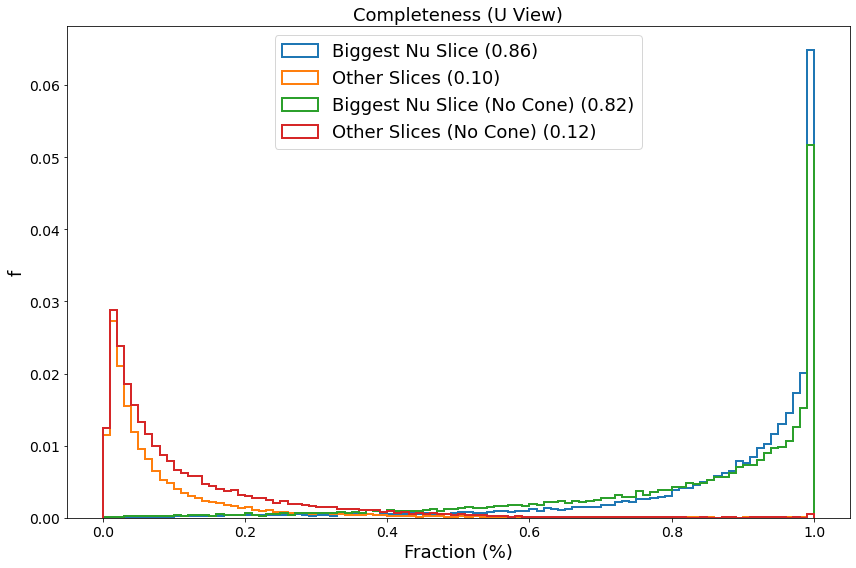

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Biggest Nu Slice: 0.87 +/- 0.18
Other Slices: 0.08 +/- 0.12
Biggest Nu Slice (No Cone): 0.82 +/- 0.20
Other Slices (No Cone): 0.11 +/- 0.13


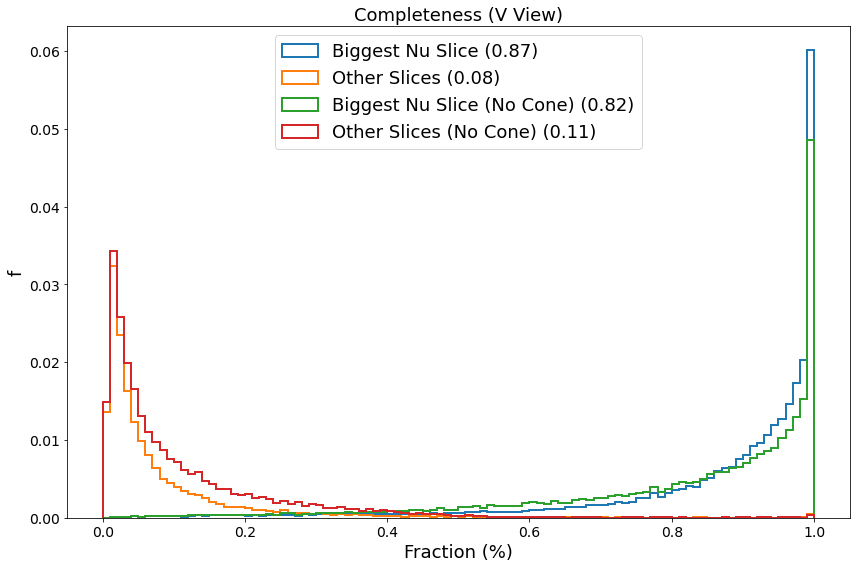

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Biggest Nu Slice: 0.93 +/- 0.14
Other Slices: 0.08 +/- 0.13
Biggest Nu Slice (No Cone): 0.88 +/- 0.18
Other Slices (No Cone): 0.12 +/- 0.14


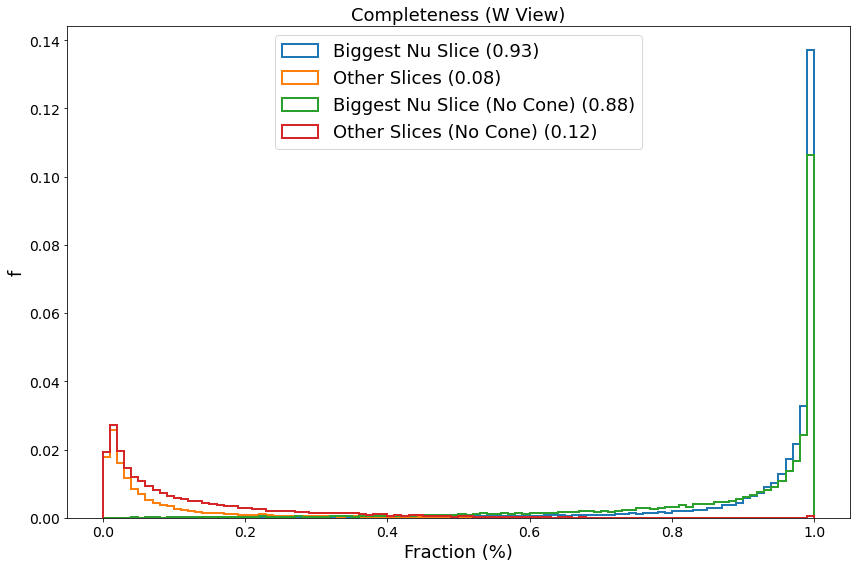

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [7]:
for view in ["U", "V", "W"]:
    completeness = [
        # ("All", dl_df[(dl_df.success == 1) & (dl_df[f"sliceNuHits_{view}"] > 5)][f"nuSliceComp_{view}"]),
        ("Biggest Nu Slice", dl_df[(dl_df.success == 1) & (dl_df[f"sliceNuHits_{view}"] > 5) & (dl_df.isBestSlice == 1)][f"nuSliceComp_{view}"]),
        ("Other Slices", dl_df[(dl_df.success == 1) & (dl_df[f"sliceNuHits_{view}"] > 5) & (dl_df.isBestSlice == 0)][f"nuSliceComp_{view}"]),
        # ("Completeness (Rearrangement)", rearrange_df[(rearrange_df.success == 1) & (rearrange_df.sliceNuHits_U > 5)][f"nuSliceComp_{view}"]),
        # ("Cheated", cheated_df[(cheated_df.success == 1) & (cheated_df[f"sliceNuHits_{view}"] > 5)][f"nuSliceComp_{view}"]),
        ("Biggest Nu Slice (No Cone)", no_shower_cones[(no_shower_cones.success == 1) & (no_shower_cones[f"sliceNuHits_{view}"] > 5) & (no_shower_cones.isBestSlice == 1)][f"nuSliceComp_{view}"]),
        ("Other Slices (No Cone)", no_shower_cones[(no_shower_cones.success == 1) & (no_shower_cones[f"sliceNuHits_{view}"] > 5) & (no_shower_cones.isBestSlice == 0)][f"nuSliceComp_{view}"]),
    ]
    plot_percentage(f"Completeness ({view} View)", completeness, f"completeness_{view}", False, True)

Biggest Nu Slice: 0.76 +/- 0.22
Other Slices: 0.18 +/- 0.26
Biggest Nu (No Cone): 0.77 +/- 0.22
Other Slices (No Cone): 0.36 +/- 0.37


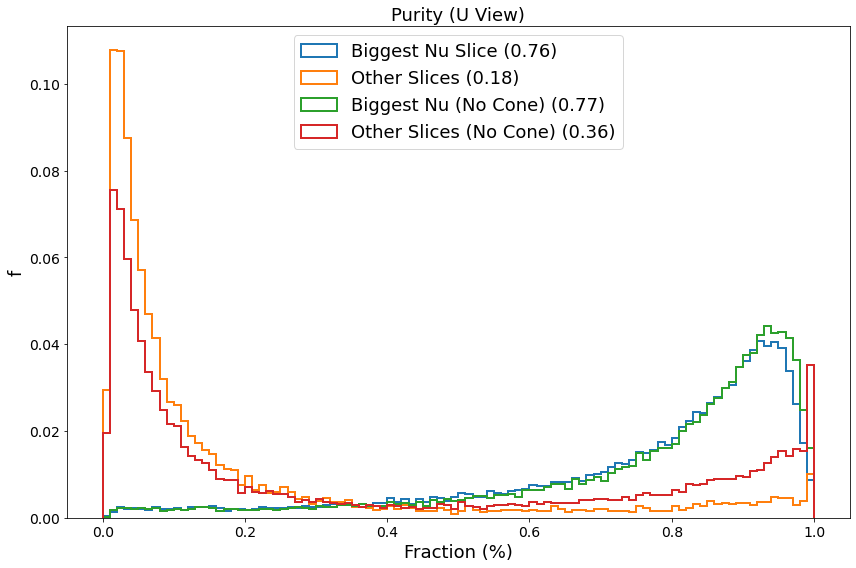

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Biggest Nu Slice: 0.74 +/- 0.23
Other Slices: 0.17 +/- 0.25
Biggest Nu (No Cone): 0.76 +/- 0.22
Other Slices (No Cone): 0.33 +/- 0.36


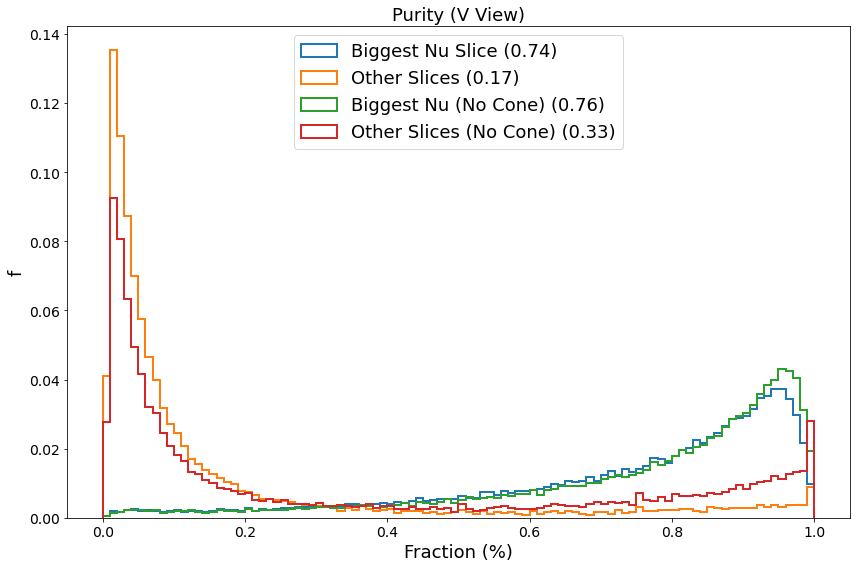

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Biggest Nu Slice: 0.84 +/- 0.19
Other Slices: 0.26 +/- 0.32
Biggest Nu (No Cone): 0.85 +/- 0.19
Other Slices (No Cone): 0.47 +/- 0.39


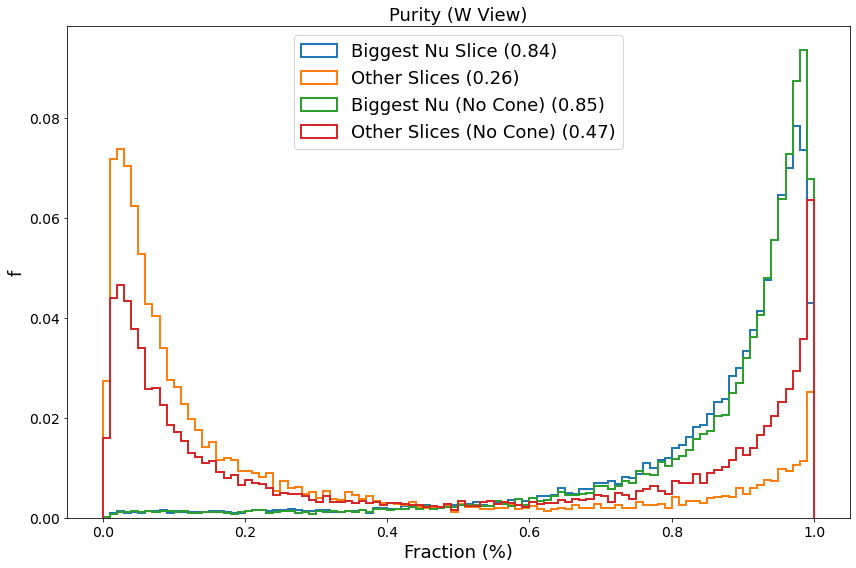

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [8]:
for view in ["U", "V", "W"]:
    purity = [
        # ("All", dl_df[(dl_df.success == 1) & (dl_df[f"sliceNuHits_{view}"] > 5)][f"nuSlicePur_{view}"]),
        ("Biggest Nu Slice", dl_df[(dl_df.success == 1) & (dl_df[f"sliceNuHits_{view}"] > 5) & (dl_df.isBestSlice == 1)][f"nuSlicePur_{view}"]),
        ("Other Slices", dl_df[(dl_df.success == 1) & (dl_df[f"sliceNuHits_{view}"] > 5) & (dl_df.isBestSlice == 0)][f"nuSlicePur_{view}"]),
        # ("Purity (Rearrangement)", rearrange_df[(rearrange_df.success == 1) & (rearrange_df.sliceNuHits_U > 5)][f"nuSlicePur_{view}"]),
        # ("Purity (Cheated)", cheated_df[(cheated_df.success == 1) & (cheated_df.sliceNuHits_U > 5)][f"nuSlicePur_{view}"]),
        ("Biggest Nu (No Cone)", no_shower_cones[(no_shower_cones.success == 1) & (no_shower_cones[f"sliceNuHits_{view}"] > 5) & (no_shower_cones.isBestSlice == 1)][f"nuSlicePur_{view}"]),
        ("Other Slices (No Cone)", no_shower_cones[(no_shower_cones.success == 1) & (no_shower_cones[f"sliceNuHits_{view}"] > 5) & (no_shower_cones.isBestSlice == 0)][f"nuSlicePur_{view}"])
    ]
    plot_percentage(f"Purity ({view} View)", purity, f"purity_{view}")

All: 0.80 +/- 0.26
Best Slice: 0.87 +/- 0.17
Not Best: 0.45 +/- 0.34


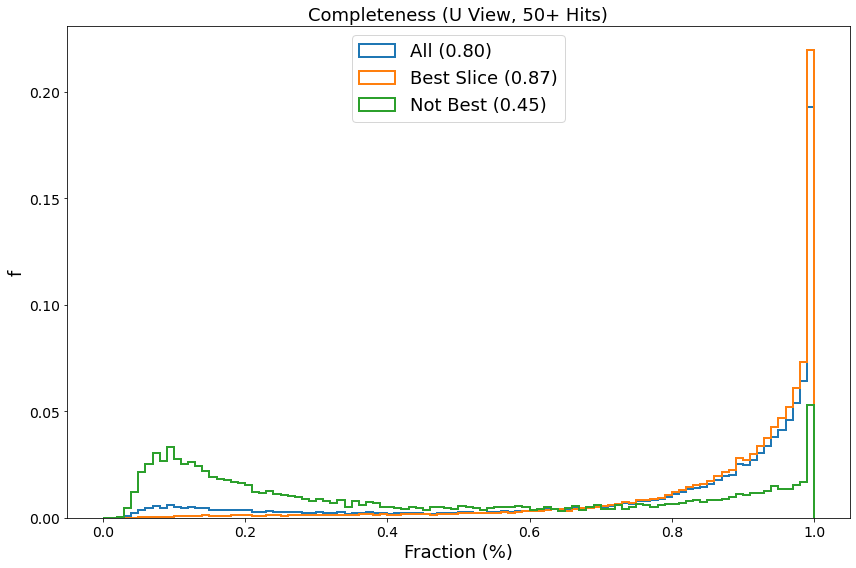

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


All: 0.75 +/- 0.23
Best Slice: 0.79 +/- 0.19
Not Best: 0.56 +/- 0.32


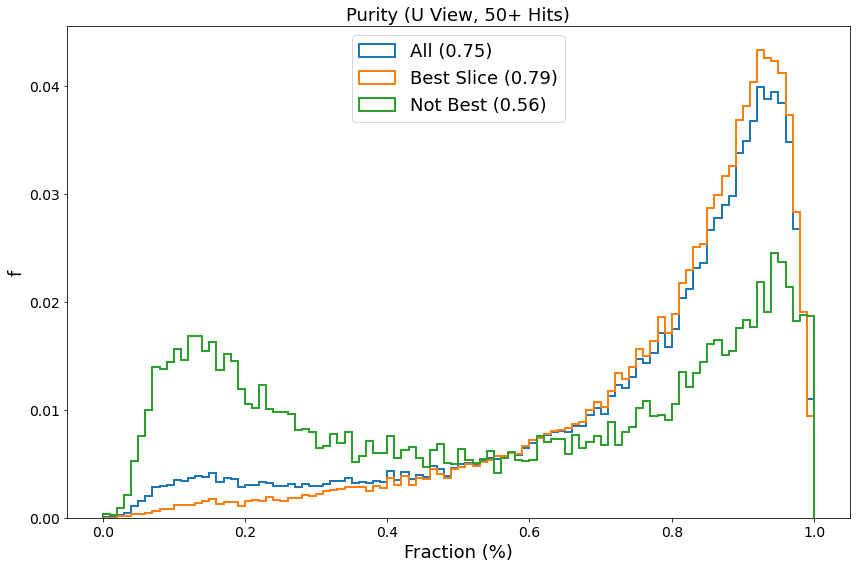

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


All: 0.79 +/- 0.27
Best Slice: 0.87 +/- 0.18
Not Best: 0.43 +/- 0.34


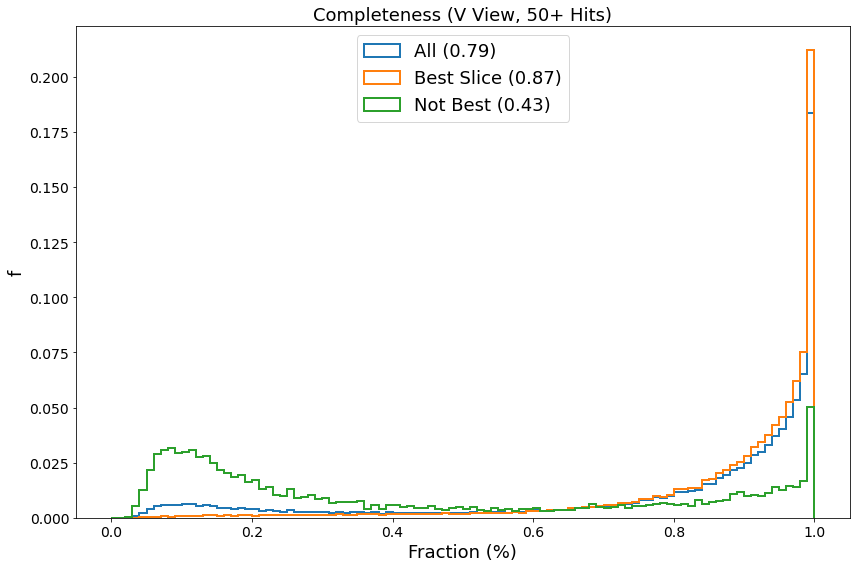

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


All: 0.72 +/- 0.25
Best Slice: 0.76 +/- 0.21
Not Best: 0.52 +/- 0.32


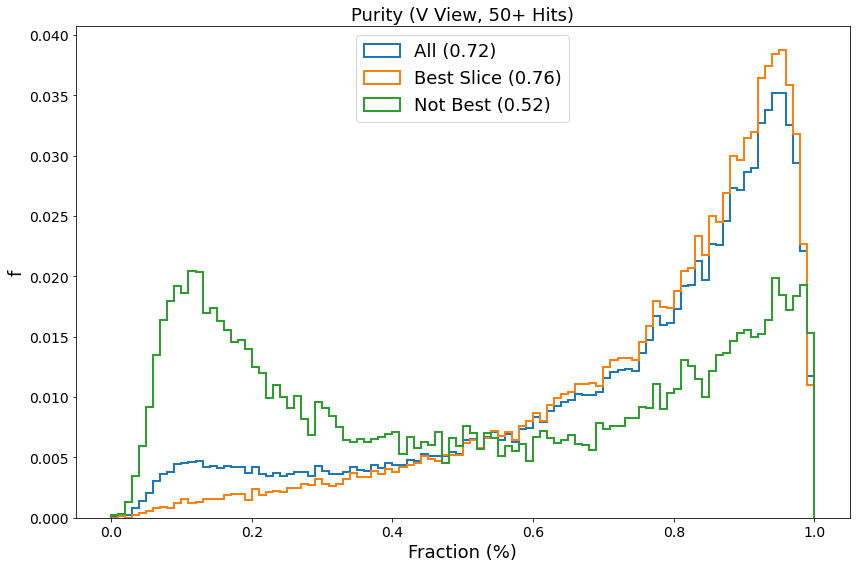

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


All: 0.86 +/- 0.25
Best Slice: 0.93 +/- 0.15
Not Best: 0.51 +/- 0.38


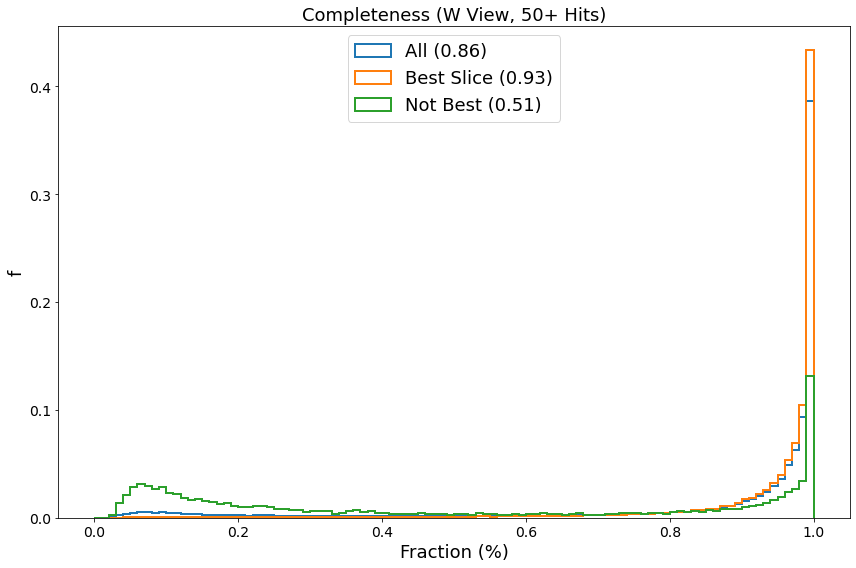

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


All: 0.83 +/- 0.20
Best Slice: 0.86 +/- 0.16
Not Best: 0.69 +/- 0.30


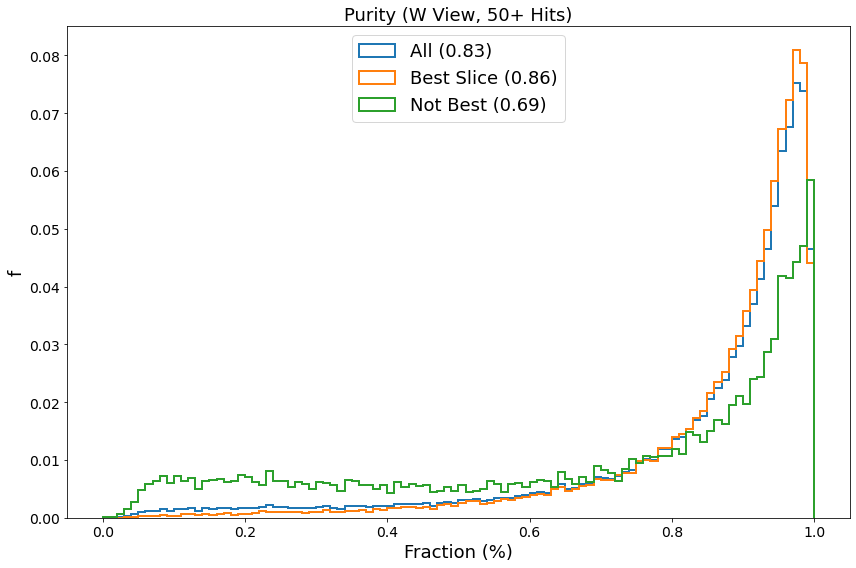

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [11]:
for view in ["U", "V", "W"]:
    completeness = [
        ("All", dl_df[(dl_df.success == 1) & (dl_df[f"sliceNuHits_{view}"] > 50)][f"nuSliceComp_{view}"]),
        ("Best Slice", dl_df[(dl_df.success == 1) & (dl_df[f"sliceNuHits_{view}"] > 50) & (dl_df.isBestSlice == 1)][f"nuSliceComp_{view}"]),
        ("Not Best", dl_df[(dl_df.success == 1) & (dl_df[f"sliceNuHits_{view}"] > 50) & (dl_df.isBestSlice == 0)][f"nuSliceComp_{view}"]),
        # ("Completeness (Rearrangement)", rearrange_df[(rearrange_df.success == 1) & (rearrange_df.sliceNuHits_U > 5)][f"nuSliceComp_{view}"]),
        # ("Cheated", cheated_df[(cheated_df.success == 1) & (cheated_df[f"sliceNuHits_{view}"] > 50)][f"nuSliceComp_{view}"]),
    ]
    plot_percentage(f"Completeness ({view} View, 50+ Hits)", completeness, f"completeness_{view}")

    purity = [
        ("All", dl_df[(dl_df.success == 1) & (dl_df[f"sliceNuHits_{view}"] > 50)][f"nuSlicePur_{view}"]),
        ("Best Slice", dl_df[(dl_df.success == 1) & (dl_df[f"sliceNuHits_{view}"] > 50) & (dl_df.isBestSlice == 1)][f"nuSlicePur_{view}"]),
        ("Not Best", dl_df[(dl_df.success == 1) & (dl_df[f"sliceNuHits_{view}"] > 50) & (dl_df.isBestSlice == 0)][f"nuSlicePur_{view}"])
        # ("Purity (Rearrangement)", rearrange_df[(rearrange_df.success == 1) & (rearrange_df.sliceNuHits_U > 5)][f"nuSlicePur_{view}"]),
        # ("Purity (Cheated)", cheated_df[(cheated_df.success == 1) & (cheated_df.sliceNuHits_U > 5)][f"nuSlicePur_{view}"]),
    ]
    plot_percentage(f"Purity ({view} View, 50+ Hits)", purity, f"purity_{view}")




Best Slice: 0.85 +/- 0.22
Not Best: 0.18 +/- 0.27
Edit Best: 0.78 +/- 0.26
Edit Not Best: 0.19 +/- 0.25


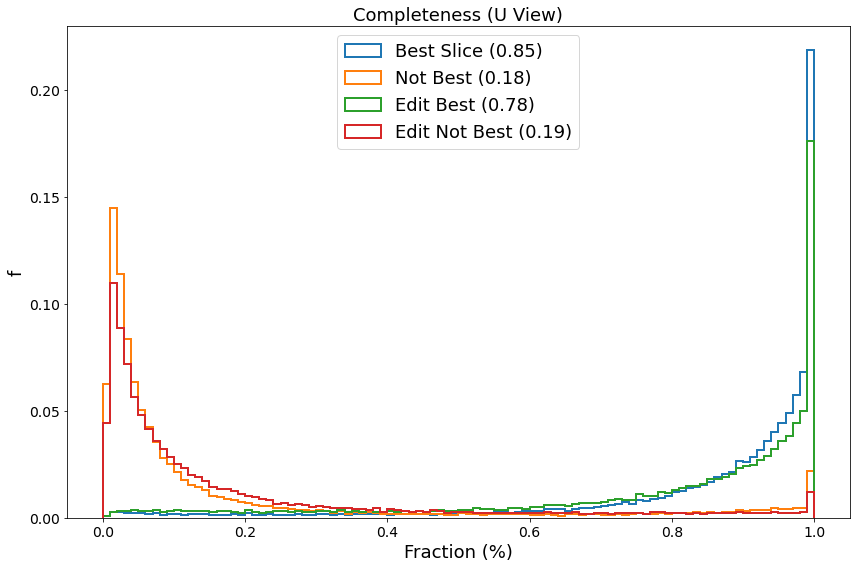

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Best Slice: 0.85 +/- 0.22
Not Best: 0.17 +/- 0.27
Edit Best: 0.79 +/- 0.26
Edit Not Best: 0.18 +/- 0.24


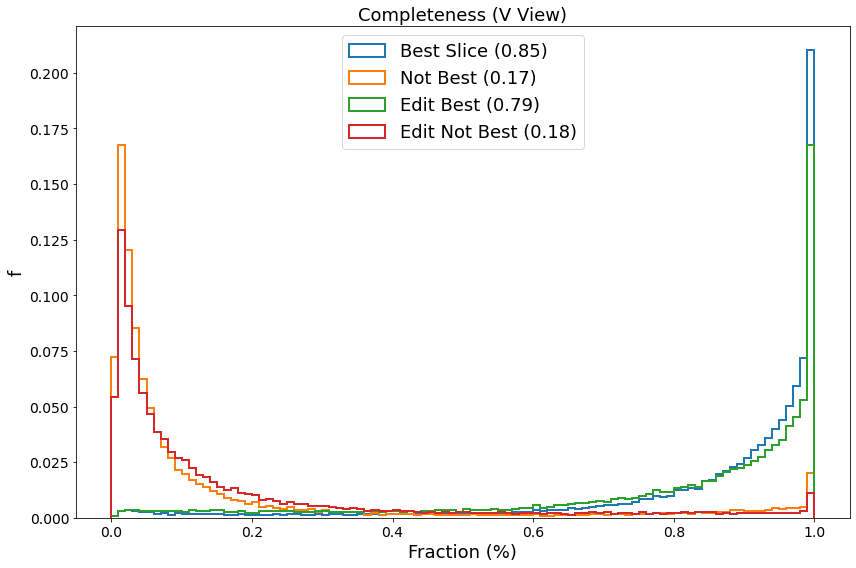

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Best Slice: 0.91 +/- 0.19
Not Best: 0.22 +/- 0.33
Edit Best: 0.84 +/- 0.24
Edit Not Best: 0.22 +/- 0.29


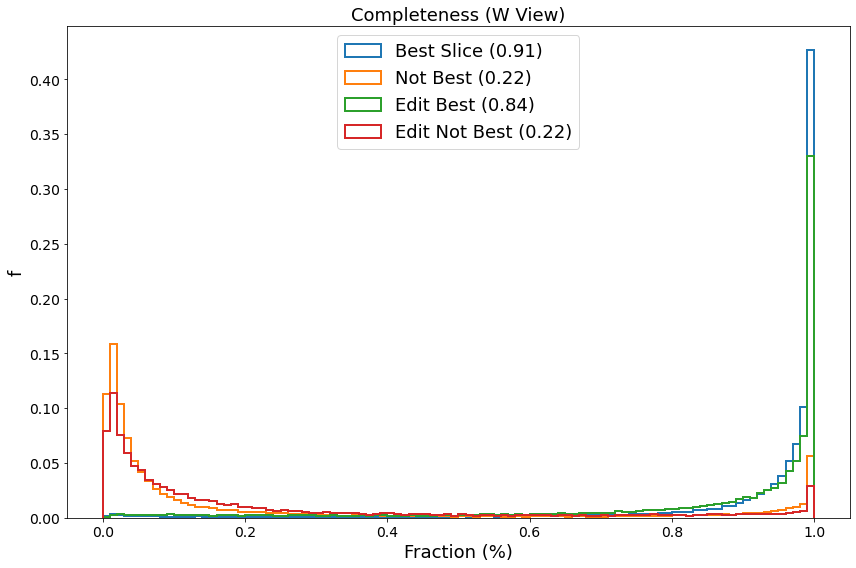

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [13]:
for view in ["U", "V", "W"]:
    completeness = [
        ("Best Slice", dl_df[(dl_df.success == 1) & (dl_df[f"sliceNuHits_{view}"] > 5) & (dl_df.isBestSlice == 1)][f"nuSliceComp_{view}"]),
        ("Not Best", dl_df[(dl_df.success == 1) & (dl_df[f"sliceNuHits_{view}"] > 5) & (dl_df.isBestSlice == 0)][f"nuSliceComp_{view}"]),
        ("Edit Best", edit_df[(edit_df.success == 1) & (edit_df[f"sliceNuHits_{view}"] > 5) & (edit_df.isBestSlice == 1)][f"nuSliceComp_{view}"]),
        ("Edit Not Best", edit_df[(edit_df.success == 1) & (edit_df[f"sliceNuHits_{view}"] > 5) & (edit_df.isBestSlice == 0)][f"nuSliceComp_{view}"]),
    ]
    plot_percentage(f"Completeness ({view} View)", completeness, f"completeness_{view}")

Best Slice: 0.75 +/- 0.24
Not Best: 0.24 +/- 0.30
Edit Best: 0.77 +/- 0.23
Edit Not Best: 0.39 +/- 0.38


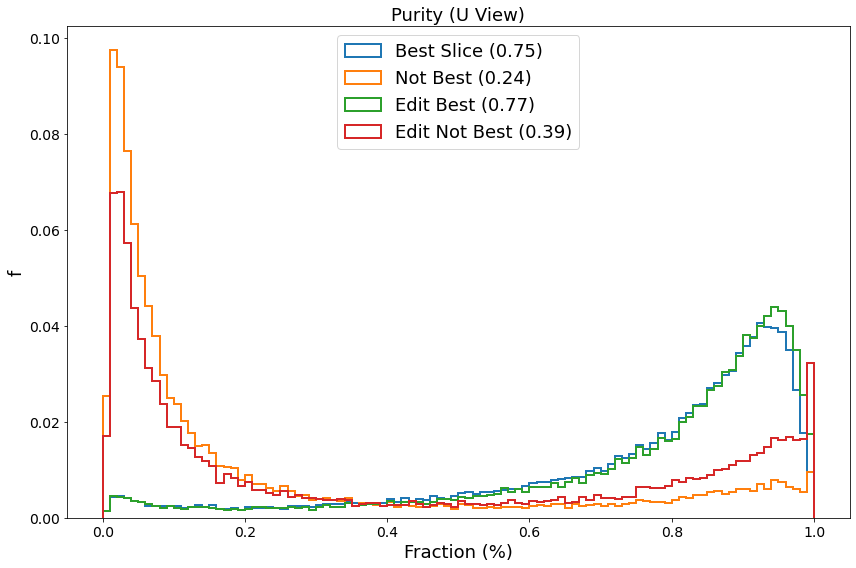

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Best Slice: 0.74 +/- 0.24
Not Best: 0.22 +/- 0.29
Edit Best: 0.75 +/- 0.24
Edit Not Best: 0.36 +/- 0.37


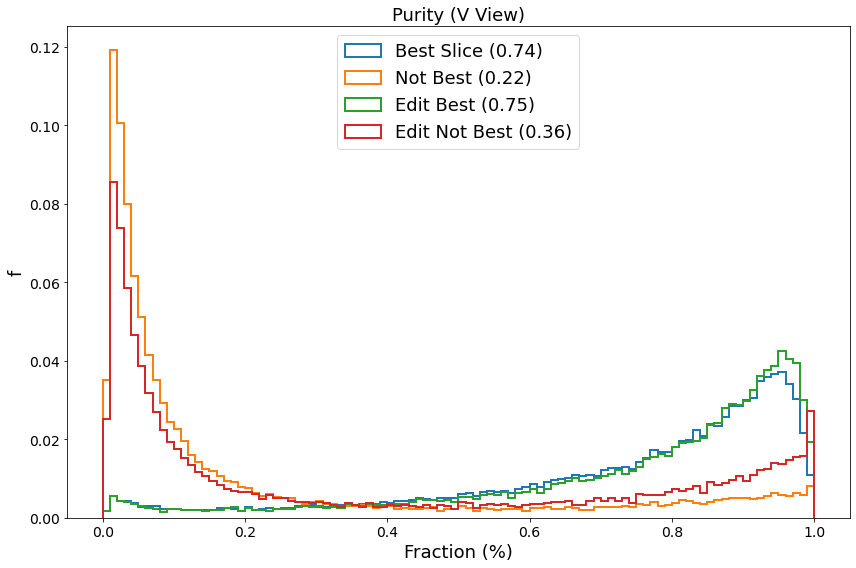

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Best Slice: 0.84 +/- 0.20
Not Best: 0.34 +/- 0.36
Edit Best: 0.85 +/- 0.20
Edit Not Best: 0.50 +/- 0.39


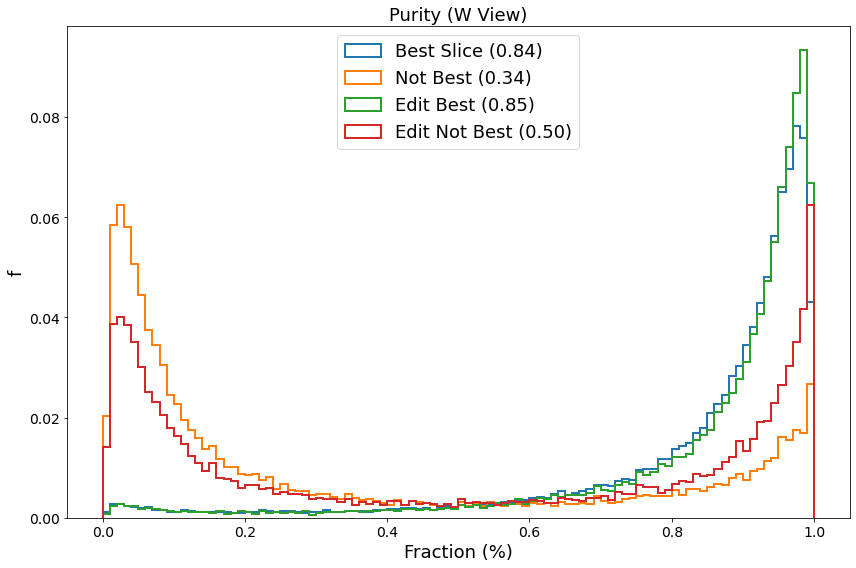

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [12]:
for view in ["U", "V", "W"]:
    purity = [
        ("Best Slice", dl_df[(dl_df.success == 1) & (dl_df[f"sliceNuHits_{view}"] > 5) & (dl_df.isBestSlice == 1)][f"nuSlicePur_{view}"]),
        ("Not Best", dl_df[(dl_df.success == 1) & (dl_df[f"sliceNuHits_{view}"] > 5) & (dl_df.isBestSlice == 0)][f"nuSlicePur_{view}"]),
        ("Edit Best", edit_df[(edit_df.success == 1) & (edit_df[f"sliceNuHits_{view}"] > 5) & (edit_df.isBestSlice == 1)][f"nuSlicePur_{view}"]),
        ("Edit Not Best", edit_df[(edit_df.success == 1) & (edit_df[f"sliceNuHits_{view}"] > 5) & (edit_df.isBestSlice == 0)][f"nuSlicePur_{view}"]),
    ]
    plot_percentage(f"Purity ({view} View)", purity, f"purity_{view}")

In [15]:
display(no_shower_cones[(no_shower_cones.success == 1) & (no_shower_cones[f"sliceNuHits_W"] > 5) & (no_shower_cones.isBestSlice == 0) & (no_shower_cones.nuSliceComp_W > 0.9)])

interesting_record_numbers = [129113]

for record_number in interesting_record_numbers:
    # Show the preceeding 10 and following 10 entries
    display(no_shower_cones.iloc[record_number - 10 : record_number + 10])

,success,trueNuEnergy,trueNuHits,isBestSlice,sliceHits_U,sliceHits_V,sliceHits_W,sliceNuHits_U,sliceNuHits_V,sliceNuHits_W,...,sliceCRHits_W,missingNuHits_U,missingNuHits_V,missingNuHits_W,nuSliceComp_U,nuSliceComp_V,nuSliceComp_W,nuSlicePur_U,nuSlicePur_V,nuSlicePur_W
2444,1,0.618947,351.0,0,60.0,282.0,214.0,0.0,48.0,44.0,...,170.0,213.0,42.0,4.0,0.000000,0.533333,0.916667,1.000000,0.170213,0.205607
3464,1,0.694093,474.0,0,441.0,569.0,420.0,11.0,10.0,164.0,...,256.0,83.0,189.0,17.0,0.117021,0.050251,0.906077,0.024943,0.017575,0.390476
5668,1,0.668131,110.0,0,108.0,33.0,120.0,9.0,0.0,27.0,...,93.0,22.0,52.0,0.0,0.290323,0.000000,1.000000,0.083333,1.000000,0.225000
7328,1,0.404184,576.0,0,131.0,199.0,263.0,0.0,0.0,111.0,...,152.0,235.0,229.0,1.0,0.000000,0.000000,0.991071,1.000000,1.000000,0.422053
7989,1,0.732049,463.0,0,365.0,461.0,351.0,30.0,2.0,15.0,...,336.0,197.0,219.0,0.0,0.132159,0.009050,1.000000,0.082192,0.004338,0.042735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128203,1,0.467752,379.0,0,866.0,277.0,112.0,64.0,9.0,42.0,...,70.0,127.0,137.0,0.0,0.335079,0.061644,1.000000,0.073903,0.032491,0.375000
128680,1,0.637456,601.0,0,133.0,294.0,156.0,3.0,3.0,61.0,...,95.0,205.0,323.0,6.0,0.014423,0.009202,0.910448,0.022556,0.010204,0.391026
129113,1,0.981510,1018.0,0,166.0,0.0,295.0,0.0,0.0,291.0,...,4.0,149.0,562.0,16.0,0.000000,0.000000,0.947883,1.000000,1.000000,0.986441
134653,1,2.132064,45.0,0,816.0,1623.0,798.0,0.0,0.0,17.0,...,781.0,1.0,27.0,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,0.021303


,success,trueNuEnergy,trueNuHits,isBestSlice,sliceHits_U,sliceHits_V,sliceHits_W,sliceNuHits_U,sliceNuHits_V,sliceNuHits_W,...,sliceCRHits_W,missingNuHits_U,missingNuHits_V,missingNuHits_W,nuSliceComp_U,nuSliceComp_V,nuSliceComp_W,nuSlicePur_U,nuSlicePur_V,nuSlicePur_W
129103,1,0.717305,830.0,0,186.0,400.0,189.0,0.0,0.0,0.0,...,189.0,306.0,216.0,308.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
129104,1,0.717305,830.0,0,128.0,107.0,154.0,128.0,90.0,150.0,...,4.0,178.0,126.0,158.0,0.418301,0.416667,0.487013,1.000000,0.841121,0.974026
129105,1,3.444642,2171.0,0,589.0,337.0,304.0,0.0,2.0,0.0,...,304.0,748.0,660.0,761.0,0.000000,0.003021,0.000000,1.000000,0.005935,1.000000
129106,1,3.444642,2171.0,0,461.0,352.0,258.0,38.0,0.0,0.0,...,258.0,710.0,662.0,761.0,0.050802,0.000000,0.000000,0.082429,1.000000,1.000000
129107,1,3.444642,2171.0,0,126.0,326.0,183.0,47.0,0.0,0.0,...,183.0,701.0,662.0,761.0,0.062834,0.000000,0.000000,0.373016,1.000000,1.000000
129108,1,3.444642,2171.0,1,700.0,1900.0,1913.0,546.0,569.0,697.0,...,1216.0,202.0,93.0,64.0,0.729947,0.859517,0.915900,0.780000,0.299474,0.364349
129109,1,3.444642,2171.0,0,135.0,193.0,134.0,0.0,0.0,0.0,...,134.0,748.0,662.0,761.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
129110,1,3.444642,2171.0,0,41.0,70.0,182.0,41.0,22.0,48.0,...,134.0,707.0,640.0,713.0,0.054813,0.033233,0.063075,1.000000,0.314286,0.263736
129111,1,0.981510,1018.0,1,371.0,1353.0,667.0,149.0,547.0,16.0,...,651.0,0.0,15.0,291.0,1.000000,0.973310,0.052117,0.401617,0.404287,0.023988
129112,1,0.981510,1018.0,0,182.0,160.0,105.0,0.0,0.0,0.0,...,105.0,149.0,562.0,307.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
